
# Проект классификации качества "Wine Quality"

## Цель проекта

Предсказать класс качества вина.

## Описание

Датасет содержит физико-химические характеристики и и органолептические (выходные) переменные красного и белого португальского вина Vinho Verde. 

Набор данных был загружен из репозитория машинного обучения [UCI](https://https://archive.ics.uci.edu/ml/datasets/wine+quality).

Классы упорядочены и не сбалансированы.


Описание от  [Kaggle](https://https://www.kaggle.com/datasets/rajyellow46/wine-quality?resource=download)

## Начало работы с данными (изучение)

### Загрузка необходимых библиотек

In [30]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
from scipy import stats

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeCV


# Modelling Helpers
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import  Normalizer , scale
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

### Вспомогательные функции

In [2]:
# построение графиков попарной корреляции
def get_pairplot(X, columns=None):
    if columns is None:
        columns = list(X.columns)
    sns.pairplot(X[columns])
    pass   

# построение ящиков с усами для отслеживания выбросов
def get_boxplot(X, columns=[]):
    for i in columns:
        f, ax = plt.subplots(figsize=(7, 3))
        sns.boxplot(x=X[i])
        pass  

### Загрузка данных

Описание переменных:

0 - тип (белое или красное)

1 - fixed acidity (фиксированная кислотность)

2 - volatile acidity (летучая кислотность)

3 - citric acid (лимонная кислота)

4 - residual sugar (остаточный сахар)

5 - chlorides (хлорид)

6 - free sulfur dioxide (свободный диоксид серы)

7 - total sulfur dioxide (общий диоксид серы)

8 - density (плотность)

9 - pH

10 - sulphates (сульфаты)

11 - alcohol (содержание спирта)

Выходные данные:

12 - quality (score between 0 and 10) - качество от 0 до 10


In [3]:
!wget https://raw.githubusercontent.com/lteplova/wine-project/main/data/winequalityN.csv

--2023-05-13 11:11:50--  https://raw.githubusercontent.com/lteplova/wine-project/main/data/winequalityN.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 390376 (381K) [text/plain]
Saving to: ‘winequalityN.csv’

winequalityN.csv    100%[===================>] 381.23K  --.-KB/s    in 0.006s  

2023-05-13 11:11:50 (57.4 MB/s) - ‘winequalityN.csv’ saved [390376/390376]



In [4]:
df = pd.read_csv('winequalityN.csv')

In [5]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### EDA Статистики

In [6]:
# копирование для работы с данными
data = df.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
data.nunique()

type                      2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64

есть незначительное количество пропусков

#### Визуализации

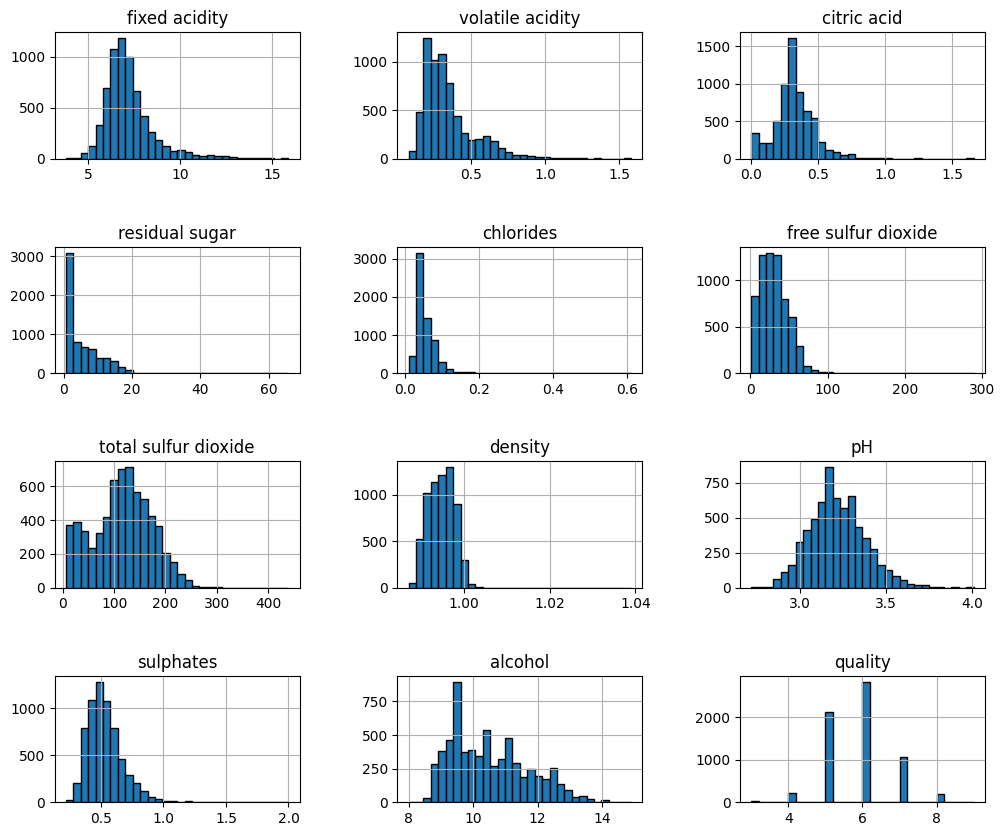

In [ ]:
# распределение данных по каждому признаку
data.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

<Axes: >

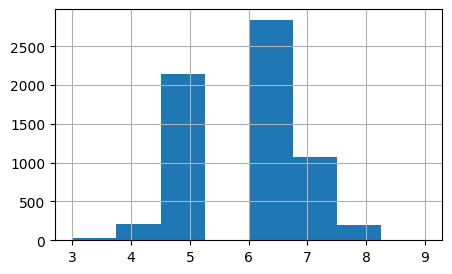

In [ ]:
# Распределение целевой переменной
data['quality'].hist(figsize=(5, 3), bins=8)

median - 6.0
mean - 5.818377712790519
mode - 6


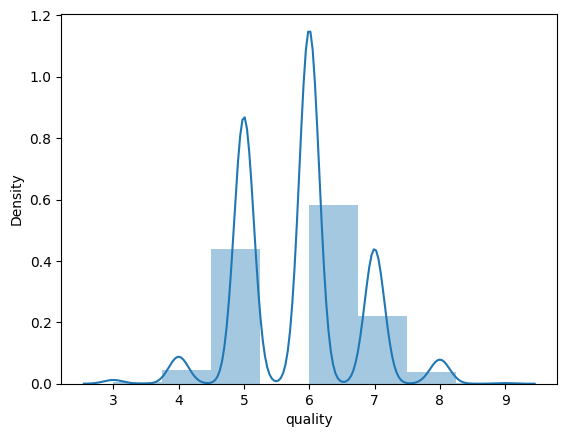

In [ ]:
x = data['quality']
print(f'median - {np.quantile(x, q=0.5)}\nmean - {np.mean(x)}\nmode - {stats.mode(x)[0][0]}')
sns.distplot(x, bins=8);

In [ ]:
# Готовим данные для графика
wine_type = df['type'].value_counts()
wine_type.head()

white    4898
red      1599
Name: type, dtype: int64

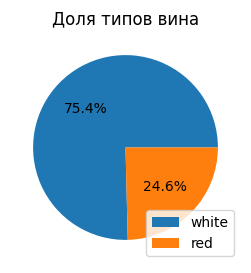

In [ ]:
# Строим круговую диаграмму
plt.figure(figsize=(5, 3))
plt.pie(wine_type, autopct='%1.1f%%')
plt.title('Доля типов вина')
plt.legend(wine_type.index)

plt.show()

<Axes: >

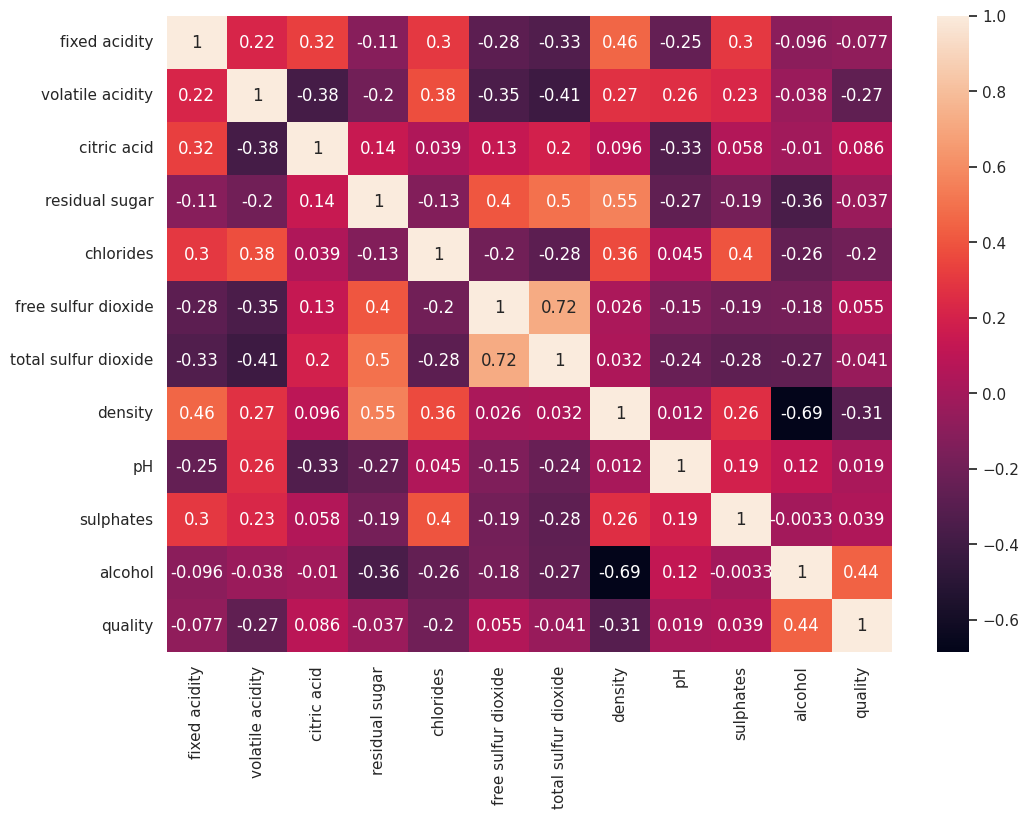

In [ ]:
# удобно визуализировать при помощи тепловой карты
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr(), annot=True)

In [ ]:
data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

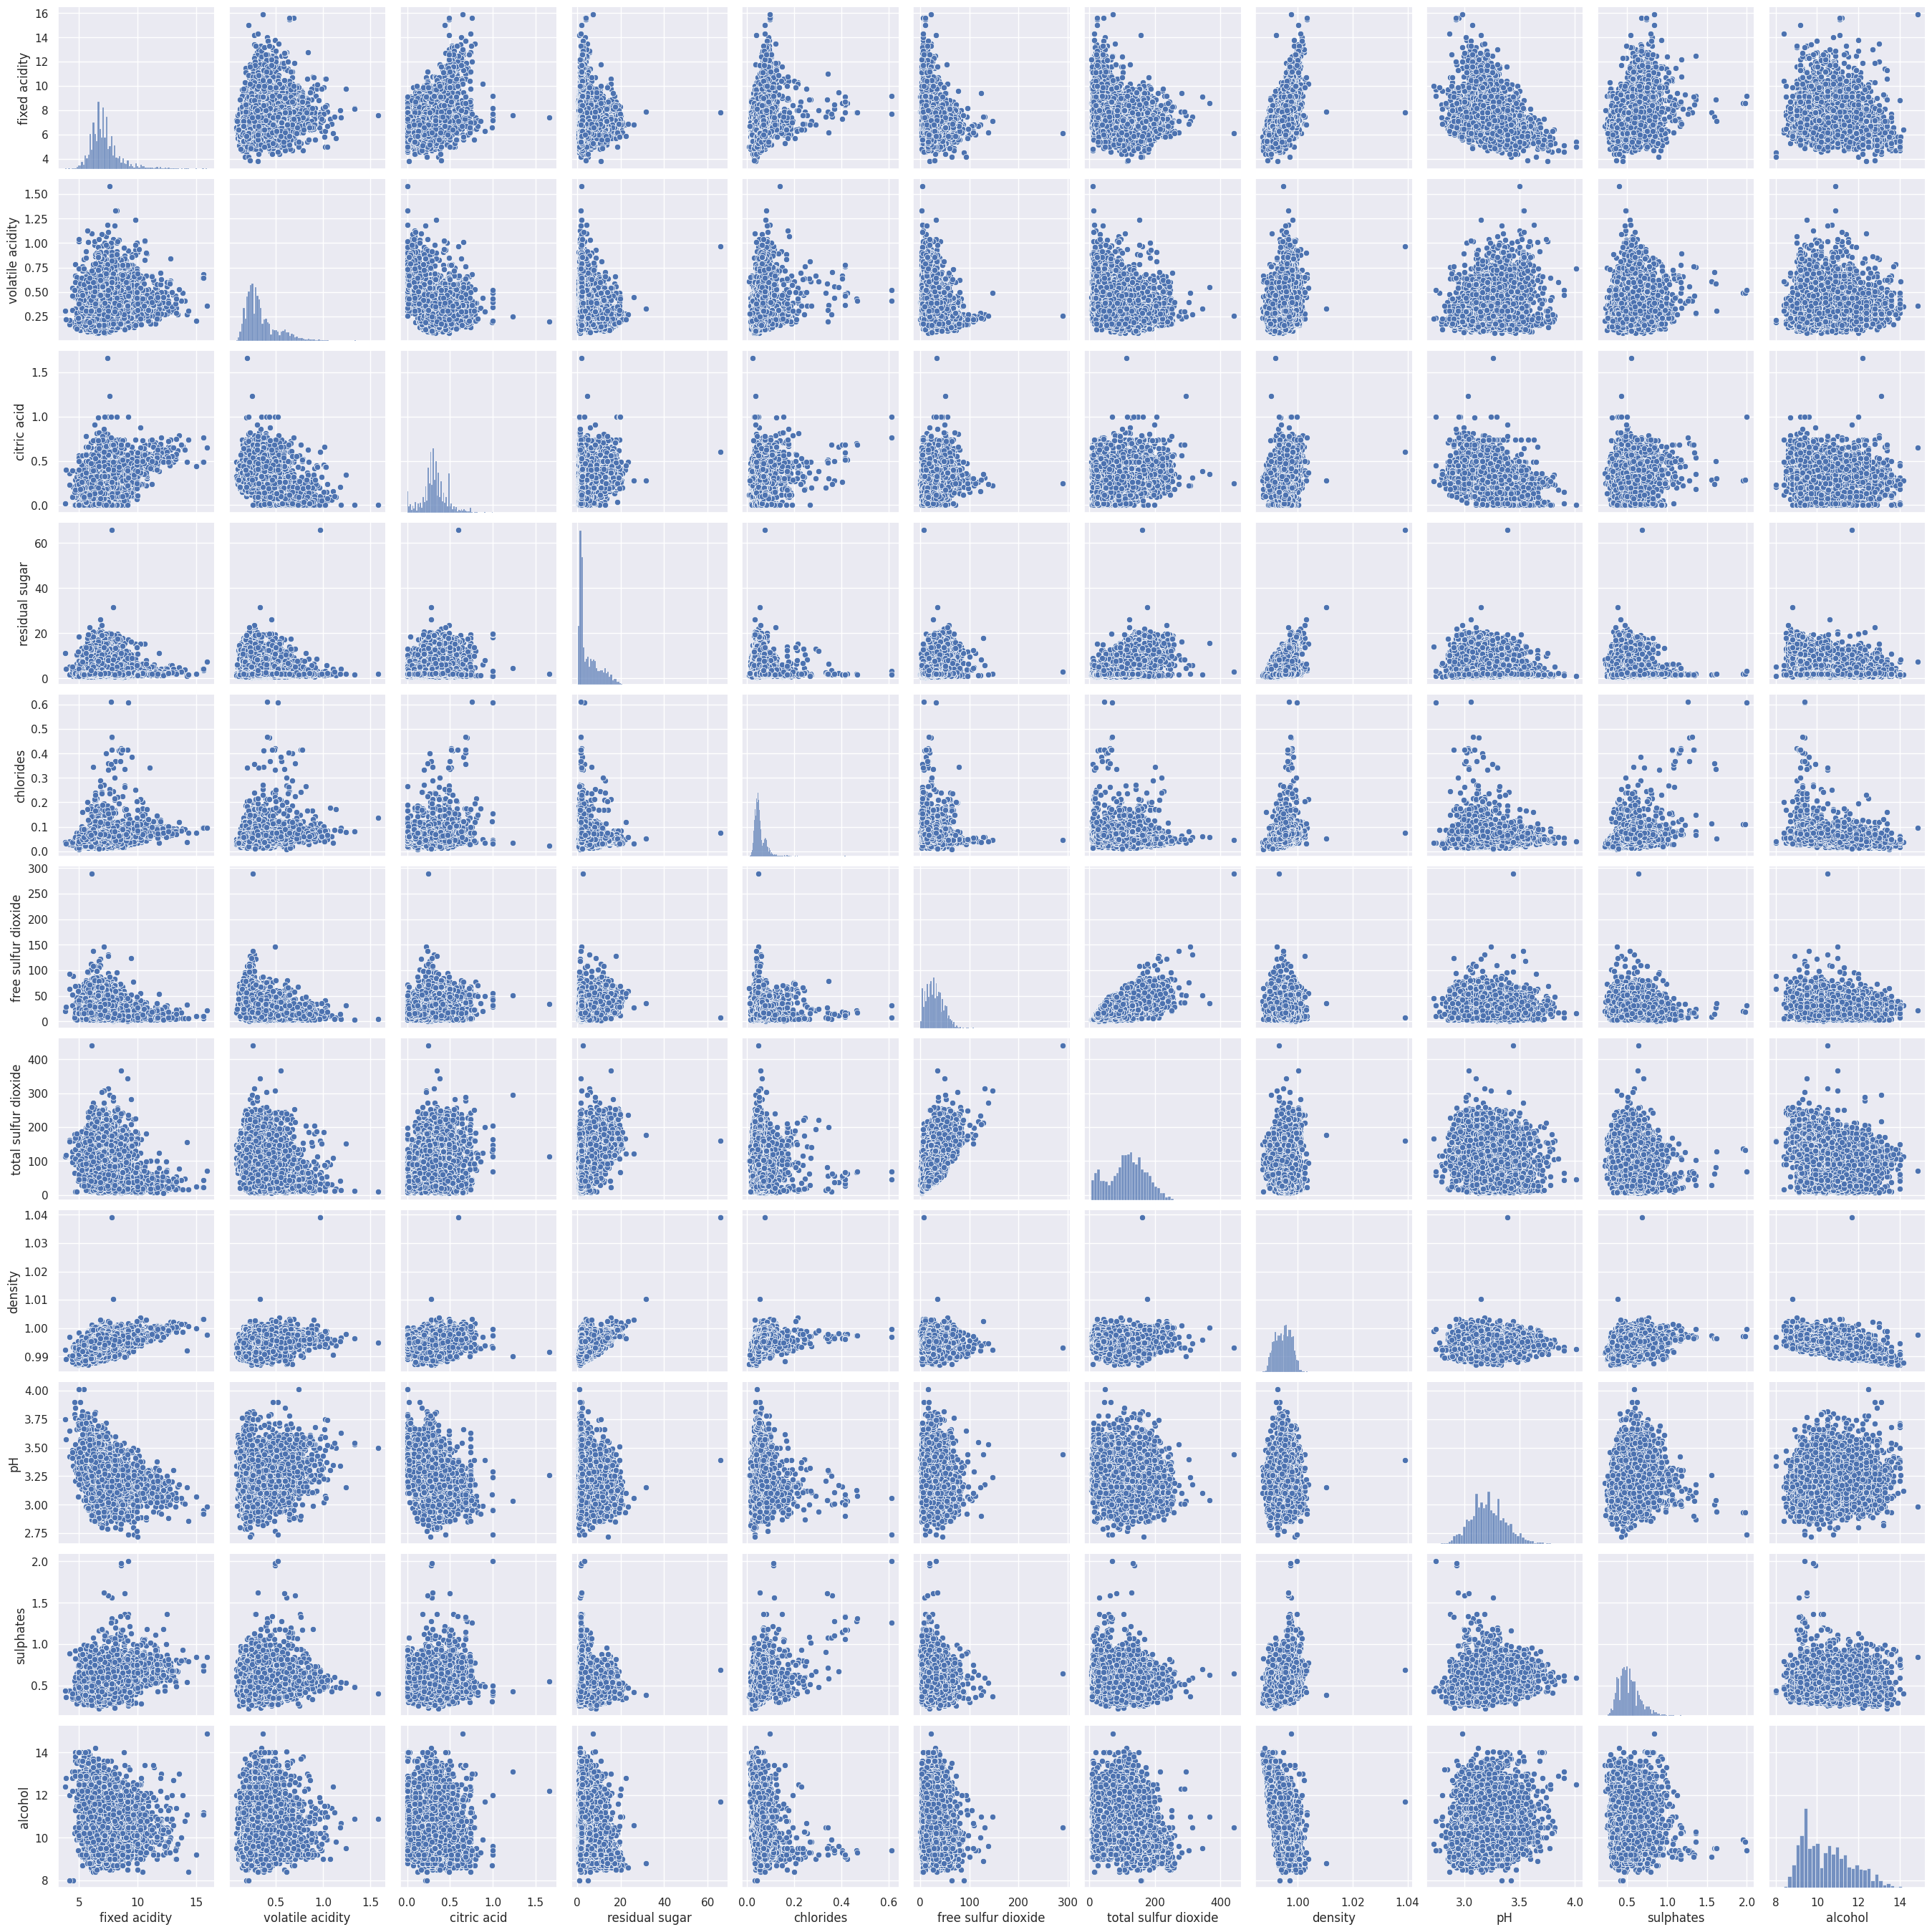

In [ ]:
 get_pairplot(data, columns = ['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])

Довольно сильные зависимости между: 

* density (плотность) и alcohol (содержание спирта)
* free sulfur dioxide (свободный диоксид серы) и total sulfur dioxide (общий диоксид серы)
* residual sugar (остаточный сахар) и density (плотность)


Исключаем из признаков density (плотность) и free sulfur dioxide (свободный диоксид серы)


Поиск и удаление выбросов

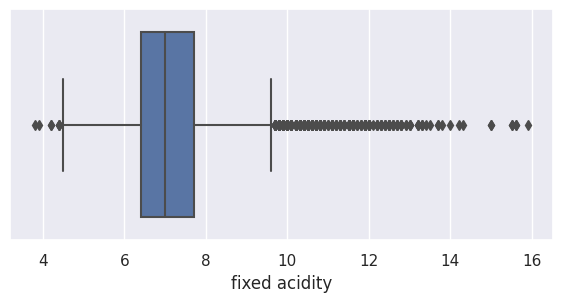

In [ ]:
get_boxplot(data, columns = ['fixed acidity'])

In [ ]:
data[data['fixed acidity'] > 15]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5340,red,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7
5452,red,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
5453,red,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
5455,red,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
5550,red,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5


In [ ]:
data[data['fixed acidity'] < 4.5]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2872,white,4.2,0.170,0.36,1.8,0.029,93.0,161.0,0.98999,3.65,0.89,12.0,7
3265,white,4.2,0.215,0.23,5.1,0.041,64.0,157.0,0.99688,3.42,0.44,8.0,3
4259,white,3.8,0.310,0.02,11.1,0.036,20.0,114.0,0.99248,3.75,0.44,12.4,6
4446,white,4.4,0.460,0.10,2.8,0.024,31.0,111.0,0.98816,3.48,0.34,13.1,6
4786,white,4.4,0.320,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,8
4787,white,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.8,8
4847,white,4.4,0.540,0.09,5.1,0.038,52.0,97.0,0.99022,3.41,0.40,12.2,7


In [8]:
# Удаление выбросов
data = data[(data['fixed acidity'] < 15) | (data['fixed acidity'].isna())]
data[data['fixed acidity'] > 15]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [9]:
data = data[(data['fixed acidity'] > 4.5) | (data['fixed acidity'].isna())]
data[data['fixed acidity'] < 4.5]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


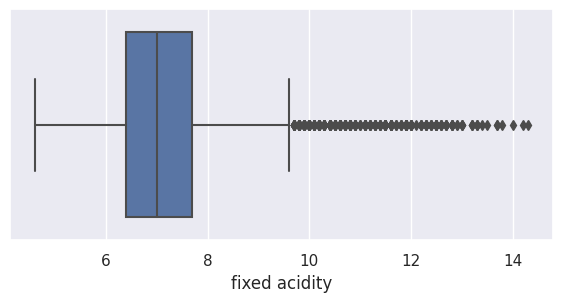

In [ ]:
get_boxplot(data, columns = ['fixed acidity'])

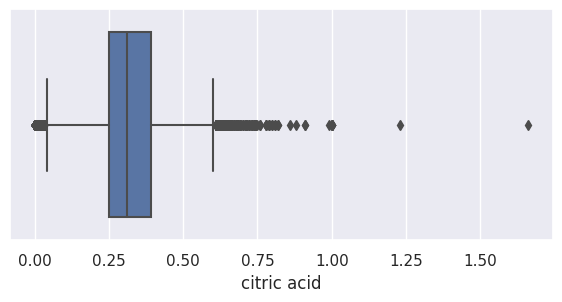

In [ ]:
get_boxplot(data, columns = ['citric acid'])

In [10]:
# Удаление выбросов
data = data[(data['citric acid'] < 0.9) | (data['citric acid'].isna())]
data[data['citric acid'] > 0.9]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


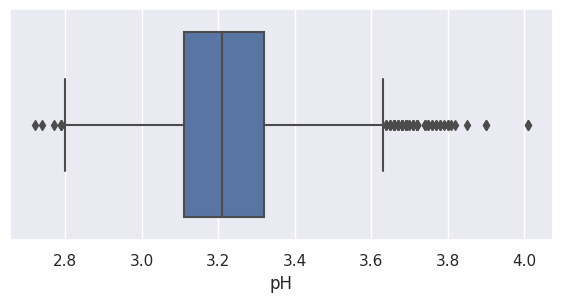

In [ ]:
get_boxplot(data, columns = ['pH'])

In [11]:
# Удаление выбросов
data = data[(data['pH'] < 3.8) | (data['pH'].isna())]
data = data[(data['pH'] > 2.8) | (data['pH'].isna())]

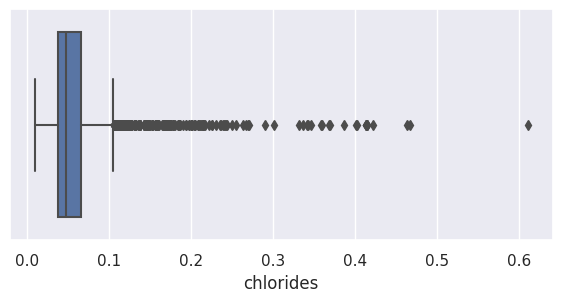

In [ ]:
get_boxplot(data, columns = ['chlorides'])

In [12]:
# Удаление выбросов
data = data[(data['chlorides'] < 0.3) | (data['chlorides'].isna())]

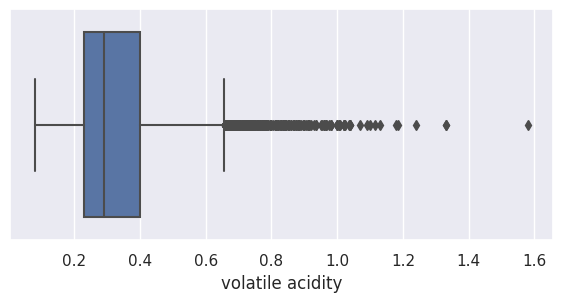

In [ ]:
get_boxplot(data, columns = ['volatile acidity'])

In [13]:
# Удаление выбросов
data = data[(data['volatile acidity'] < 1.2) | (data['volatile acidity'].isna())]

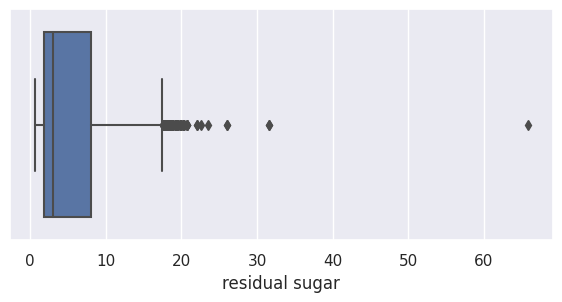

In [ ]:
get_boxplot(data, columns = ['residual sugar'])

In [14]:
# Удаление выбросов
data = data[(data['residual sugar'] < 20) | (data['residual sugar'].isna())]

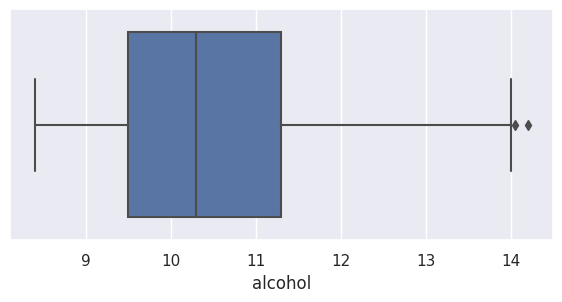

In [ ]:
get_boxplot(data, columns = ['alcohol'])

In [15]:
# Удаление выбросов
data = data[(data['alcohol'] < 14) | (data['alcohol'].isna())]

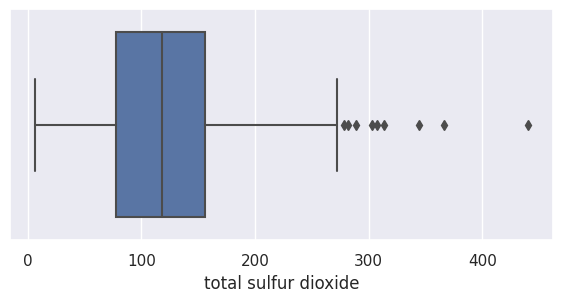

In [ ]:
get_boxplot(data, columns = ['total sulfur dioxide'])

In [16]:
# Удаление выбросов
data = data[(data['total sulfur dioxide'] < 250) | (data['total sulfur dioxide'].isna())]

## Подготовка данных

### Выбор характеристик, перевод в категориальные переменные

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6369 entries, 1 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6369 non-null   object 
 1   fixed acidity         6359 non-null   float64
 2   volatile acidity      6361 non-null   float64
 3   citric acid           6366 non-null   float64
 4   residual sugar        6367 non-null   float64
 5   chlorides             6367 non-null   float64
 6   free sulfur dioxide   6369 non-null   float64
 7   total sulfur dioxide  6369 non-null   float64
 8   density               6369 non-null   float64
 9   pH                    6360 non-null   float64
 10  sulphates             6365 non-null   float64
 11  alcohol               6369 non-null   float64
 12  quality               6369 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 696.6+ KB


In [17]:
# удаление пропусков
data = data.dropna(axis = 0)

In [18]:
# количество удаленных данных по сравнению с исходными данными
len(df) - len(data)

162

In [19]:
X = data[['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']]
y = data['quality']

In [20]:
X

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol
1,white,6.3,0.300,0.34,1.6,0.049,132.0,3.30,0.49,9.5
2,white,8.1,0.280,0.40,6.9,0.050,97.0,3.26,0.44,10.1
3,white,7.2,0.230,0.32,8.5,0.058,186.0,3.19,0.40,9.9
4,white,7.2,0.230,0.32,8.5,0.058,186.0,3.19,0.40,9.9
5,white,8.1,0.280,0.40,6.9,0.050,97.0,3.26,0.44,10.1
...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,38.0,3.42,0.82,9.5
6492,red,6.2,0.600,0.08,2.0,0.090,44.0,3.45,0.58,10.5
6494,red,6.3,0.510,0.13,2.3,0.076,40.0,3.42,0.75,11.0
6495,red,5.9,0.645,0.12,2.0,0.075,44.0,3.57,0.71,10.2


In [21]:
# перевод признака 'type' в категориальный
le = LabelEncoder()
le.fit(X['type'])

LabelEncoder()

In [22]:
le.transform(X['type'])

array([1, 1, 1, ..., 0, 0, 0])

In [23]:
X['type'] = le.transform(X['type'])
X

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol
1,1,6.3,0.300,0.34,1.6,0.049,132.0,3.30,0.49,9.5
2,1,8.1,0.280,0.40,6.9,0.050,97.0,3.26,0.44,10.1
3,1,7.2,0.230,0.32,8.5,0.058,186.0,3.19,0.40,9.9
4,1,7.2,0.230,0.32,8.5,0.058,186.0,3.19,0.40,9.9
5,1,8.1,0.280,0.40,6.9,0.050,97.0,3.26,0.44,10.1
...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,38.0,3.42,0.82,9.5
6492,0,6.2,0.600,0.08,2.0,0.090,44.0,3.45,0.58,10.5
6494,0,6.3,0.510,0.13,2.3,0.076,40.0,3.42,0.75,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,44.0,3.57,0.71,10.2


In [ ]:
y.value_counts()

6    2771
5    2077
7    1059
4     211
8     187
3      25
9       5
Name: quality, dtype: int64

### Добавление новых признаков

In [24]:
X['all_acidity'] = (X['fixed acidity']+ X['volatile acidity'] + X['citric acid'])/3 # средняя кислотность по всем видам кислотности
X['sugar_alc'] = X['alcohol']/X['residual sugar'] # отношение крепости к содержанию сахара

In [ ]:
X

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,all_acidity,sugar_alc
1,1,6.3,0.300,0.34,1.6,0.049,132.0,3.30,0.49,9.5,2.313333,5.937500
2,1,8.1,0.280,0.40,6.9,0.050,97.0,3.26,0.44,10.1,2.926667,1.463768
3,1,7.2,0.230,0.32,8.5,0.058,186.0,3.19,0.40,9.9,2.583333,1.164706
4,1,7.2,0.230,0.32,8.5,0.058,186.0,3.19,0.40,9.9,2.583333,1.164706
5,1,8.1,0.280,0.40,6.9,0.050,97.0,3.26,0.44,10.1,2.926667,1.463768
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,38.0,3.42,0.82,9.5,2.500000,5.000000
6492,0,6.2,0.600,0.08,2.0,0.090,44.0,3.45,0.58,10.5,2.293333,5.250000
6494,0,6.3,0.510,0.13,2.3,0.076,40.0,3.42,0.75,11.0,2.313333,4.782609
6495,0,5.9,0.645,0.12,2.0,0.075,44.0,3.57,0.71,10.2,2.221667,5.100000


### Финальный набор данных для обучения модели

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

### Выбор модели

#### Модель SVC()

In [26]:
# создание датасета с результирующими метриками
df_metrics = pd.DataFrame(columns = ['model', 'f1_score', 'accuracy'])
df_metrics

,model,f1_score,accuracy


In [27]:
# обучение
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

In [28]:
# оценка
predicted = clf.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        41
           5       0.61      0.56      0.59       424
           6       0.51      0.73      0.60       551
           7       0.55      0.24      0.33       208
           8       0.00      0.00      0.00        39

    accuracy                           0.55      1267
   macro avg       0.28      0.26      0.25      1267
weighted avg       0.52      0.55      0.51      1267



In [31]:
# Запись результатов
df_metrics = df_metrics.append({
'model' : 'SVC',
'f1_score' : f1_score(y_test, predicted, average='weighted'),
'accuracy': accuracy_score(y_test, predicted)
}, ignore_index=True)

#### Модель LogisticRegression()

In [ ]:
%time

param_grid = {'penalty':['l2', 'l1', 'elasticnet'],
              'max_iter': [100, 500, 1000, 1500, 2000],
            #   'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
              'multi_class': ['auto', 'ovr', 'multinomial']
}
model = LogisticRegression()
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid.fit(X,y)

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)

In [32]:
# обучение
clf = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1500, multi_class='ovr')) 
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.50      0.02      0.05        41
           5       0.57      0.57      0.57       424
           6       0.50      0.73      0.59       551
           7       0.56      0.11      0.18       208
           8       0.00      0.00      0.00        39

    accuracy                           0.53      1267
   macro avg       0.36      0.24      0.23      1267
weighted avg       0.52      0.53      0.48      1267



In [33]:
# Запись результатов
df_metrics = df_metrics.append({
'model' : 'LogisticRegression',
'f1_score' : f1_score(y_test, predicted, average='weighted'),
'accuracy': accuracy_score(y_test, predicted)
}, ignore_index=True)

#### Модель LinearSVC()

In [50]:
# инициализация модели
clf = make_pipeline(StandardScaler(), LinearSVC()) 

# обучение
clf.fit(X_train, y_train)
# полученные предсказания
predicted = clf.predict(X_test)

In [54]:
# Запись результатов
df_metrics = df_metrics.append({
'model' : 'LinearSVC',
'f1_score' : f1_score(y_test, predicted, average='weighted'),
'accuracy': accuracy_score(y_test, predicted)
}, ignore_index=True)

####  Модель DecisionTreeClassifier()

In [34]:
clf =  make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=5, random_state=123))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, random_state=123))])

In [35]:
# метрики
predicted = clf.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        41
           5       0.55      0.57      0.56       424
           6       0.49      0.60      0.54       551
           7       0.47      0.36      0.41       208
           8       0.00      0.00      0.00        39

    accuracy                           0.51      1267
   macro avg       0.25      0.25      0.25      1267
weighted avg       0.47      0.51      0.49      1267



In [36]:
# Запись результатов
df_metrics = df_metrics.append({
'model' : 'DecisionTreeClassifier',
'f1_score' : f1_score(y_test, predicted, average='weighted'),
'accuracy': accuracy_score(y_test, predicted)
}, ignore_index=True)

#### Модель RandomForestClassifier()

In [37]:
clf= make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=5, random_state=123))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, random_state=123))])

In [38]:
predicted = clf.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        41
           5       0.59      0.54      0.56       424
           6       0.49      0.74      0.59       551
           7       0.59      0.12      0.21       208
           8       0.00      0.00      0.00        39

    accuracy                           0.52      1267
   macro avg       0.28      0.23      0.23      1267
weighted avg       0.51      0.52      0.48      1267



In [39]:
# Запись результатов
df_metrics = df_metrics.append({
'model' : 'RandomForestClassifier',
'f1_score' : f1_score(y_test, predicted, average='weighted'),
'accuracy': accuracy_score(y_test, predicted)
}, ignore_index=True)


#### Модель BaggingClassifier()

In [40]:
clf = make_pipeline(StandardScaler(), BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=10,
                           max_samples=0.5,
                           max_features=0.5,
                           random_state=10))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(estimator=DecisionTreeClassifier(),
                                   max_features=0.5, max_samples=0.5,
                                   random_state=10))])

In [42]:
predicted = clf.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.42      0.20      0.27        41
           5       0.62      0.65      0.63       424
           6       0.59      0.69      0.64       551
           7       0.61      0.44      0.51       208
           8       0.75      0.23      0.35        39

    accuracy                           0.60      1267
   macro avg       0.50      0.37      0.40      1267
weighted avg       0.60      0.60      0.59      1267



In [43]:
# Запись результатов
df_metrics = df_metrics.append({
'model' : 'BaggingClassifier',
'f1_score' : f1_score(y_test, predicted, average='weighted'),
'accuracy': accuracy_score(y_test, predicted)
}, ignore_index=True)


#### Модель StackingClassifier()

In [45]:
# Создаем стэккинг и обучаем его на наших данных 
clf = StackingClassifier(
    [
        ('DecisionTreeClassifier', DecisionTreeClassifier()),
        ('RandomForestClassifier', RandomForestClassifier()),
        ('LinearSVC', LinearSVC())
    ])
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('DecisionTreeClassifier',
                                DecisionTreeClassifier()),
                               ('RandomForestClassifier',
                                RandomForestClassifier()),
                               ('LinearSVC', LinearSVC())])

In [47]:
predicted = clf.predict(X_test)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.83      0.12      0.21        41
           5       0.75      0.61      0.67       424
           6       0.63      0.79      0.70       551
           7       0.67      0.66      0.67       208
           8       0.78      0.36      0.49        39

    accuracy                           0.67      1267
   macro avg       0.61      0.42      0.46      1267
weighted avg       0.68      0.67      0.66      1267



In [48]:
# Запись результатов
df_metrics = df_metrics.append({
'model' : 'StackingClassifier',
'f1_score' : f1_score(y_test, predicted, average='weighted'),
'accuracy': accuracy_score(y_test, predicted)
}, ignore_index=True)

### Итоговый датасет с результатами по метрикам

In [55]:
df_metrics.sort_values(by = 'accuracy', ascending=False, ignore_index=True)

,model,f1_score,accuracy
0,StackingClassifier,0.660433,0.670876
1,BaggingClassifier,0.592786,0.602999
2,SVC,0.513020,0.546172
3,LogisticRegression,0.481676,0.527230
4,RandomForestClassifier,0.479402,0.524073
5,LinearSVC,0.455464,0.517758
6,DecisionTreeClassifier,0.487892,0.508287


Вывод: лучше всего себя показала модель StackingClassifier, лучший скор 0,67

### Обучение модели

In [ ]:
%%time
param_grid = {'max_iter': [100, 1000, 2000, 3000, 5000, 10],
              'penalty' : ['l1', 'l2', 'elasticnet'],
              'class_weight' : ['balanced'],
              'multi_class': ['ovr'],

}
lg = LogisticRegression()
grid = GridSearchCV(lg, param_grid, cv=10, scoring='accuracy')

grid.fit(X_train,y_train)

CPU times: user 2min 37s, sys: 1min 57s, total: 4min 35s
Wall time: 2min 43s


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'class_weight': ['balanced'],
                         'max_iter': [100, 1000, 2000, 3000, 5000, 10],
                         'multi_class': ['ovr'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)

0.3634617333613989
LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='ovr')


In [56]:
# Создаем стэккинг и обучаем его на наших данных 
clf = StackingClassifier(
    [
        ('DecisionTreeClassifier', DecisionTreeClassifier()),
        ('RandomForestClassifier', RandomForestClassifier()),
        ('LinearSVC', LinearSVC())
    ])
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('DecisionTreeClassifier',
                                DecisionTreeClassifier()),
                               ('RandomForestClassifier',
                                RandomForestClassifier()),
                               ('LinearSVC', LinearSVC())])

0.4747401984860179
SGDClassifier(epsilon=0.5)


## Оценка результатов работы модели

In [57]:
predicted = clf.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.80      0.10      0.17        41
           5       0.74      0.64      0.69       424
           6       0.64      0.74      0.69       551
           7       0.61      0.71      0.66       208
           8       0.81      0.33      0.47        39

    accuracy                           0.67      1267
   macro avg       0.60      0.42      0.45      1267
weighted avg       0.68      0.67      0.66      1267



In [58]:
predicted

array([6, 7, 5, ..., 5, 7, 7])

### Сохранение результатов

In [59]:
fin_pred=pd.DataFrame(predicted,index=X_test.index,columns=['quality'])
fin_pred['quality']=fin_pred['quality'].round(0).astype(np.int32)
fin_pred.head()

,quality
1404,6
2143,7
2792,5
847,5
5002,5


In [60]:
fin_pred.to_csv('submission.csv')